In [1]:
import sys
sys.path.append("../")


import os
%matplotlib inline
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
from patsy import dmatrices
from openpyxl import load_workbook
import engarde.decorators as ed

from library import test_data
@ed.verify(test_data.allyearsandtpsd)
@ed.verify(test_data.alldois)
def load(data):
    return data

In [17]:
data_path = '/Users/kylieleblancKylie/domino/dofis/data/'
table_path = '/Users/kylieleblancKylie/domino/dofis/results/impact/'
data = pd.read_csv(os.path.join(data_path, 'clean', 'gdid.csv'),
                  sep=",", low_memory= False)

#load(data)
data.tail()
data[data.doi == True].district.nunique()

822

In [18]:
data = pd.read_csv(os.path.join(data_path, 'clean', 'master_data_school.csv'),
                  sep=",", low_memory= False)
data = data[data.year == 2018]
data.sample(5)

,Unnamed: 0,year,campus,campname,campischarter,district,distname,distischarter,rating_academic,rating_financial,...,district_status,type_urban,type_suburban,type_town,type_rural,eligible,teachers_nodegree,teachers_badegree,teachers_msdegree,teachers_phddegree
55837,55837,2018,101907108,HANCOCK EL,N,101907,CYPRESS-FAIRBANKS ISD,N,Not Rated: Harvey Provision,Pass,...,tps,0,1,0,0,1,0.000000,0.843137,0.156863,0.0
51997,51997,2018,14906129,MAXDALE EL,N,14906,KILLEEN ISD,N,C,Pass,...,tps,1,0,0,0,1,0.000000,0.803879,0.193966,0.0
53539,53539,2018,57803012,UPLIFT LUNA SECONDARY SCHOOL,Y,57803,UPLIFT EDUCATION,Y,B,Pass,...,charter,0,0,0,0,0,0.022654,0.715210,0.258900,0.0
58540,58540,2018,187907041,LIVINGSTON J H,N,187907,LIVINGSTON ISD,N,C,Pass,...,doi,0,0,1,0,1,0.012384,0.801858,0.185759,0.0
57487,57487,2018,129905104,SOUTHSIDE EL,N,129905,MABANK ISD,N,B,Pass,...,doi,0,1,0,0,1,0.000000,0.920635,0.079365,0.0


In [19]:
#data = data[data.doi == True][['year','campus', 'district', 'treatpost', 'doi_year']]

In [20]:
school_counts = pd.DataFrame(data.doi_year.value_counts(sort = False))
school_counts

,doi_year
2016.0,938
2017.0,4252
2018.0,947
2019.0,206
2015.0,1


In [21]:
district_df = pd.DataFrame(data.groupby(['district']).agg({'doi_year': 'mean'}))
district_counts = pd.DataFrame(district_df.doi_year.value_counts(sort = False))
district_counts = district_counts.sort_index()
district_counts

,doi_year
2015.0,1
2016.0,69
2017.0,585
2018.0,133
2019.0,23


In [27]:
data[(data.doi == False) & (data.distischarter == 'N')].district.nunique()

201

In [36]:
data[(data.doi == False) & (data.distischarter == 'N') & (data.rating_academic == 'F') | (data.rating_financial == "Fail")].district.nunique()

10

In [24]:
data.distischarter

51734    N
51735    N
51736    N
51737    N
51738    N
        ..
60484    N
60485    N
60486    N
60487    N
60488    N
Name: distischarter, Length: 8755, dtype: object

In [8]:
district_counts.doi_year.cumsum() 

2016.0     69
2017.0    654
2018.0    787
2019.0    810
Name: doi_year, dtype: int64

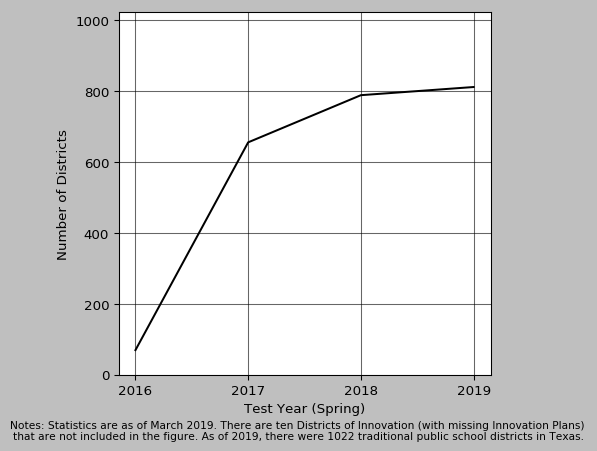

In [11]:
import matplotlib
plt.style.use('grayscale')
my_dpi=96
plt.figure(figsize=(480/my_dpi, 480/my_dpi), dpi=my_dpi)

# Pre
plt.plot(['2016', '2017', '2018', '2019'], district_counts.doi_year.cumsum() , color = 'black')

plt.ylabel('Number of Districts')
#plt.title('Texas District of Innovation Takeup Over Time')
plt.xlabel('Test Year (Spring)', size = 'medium')
plt.grid(True, alpha = .6)


plt.ylim(0, 1022)
txt="Notes: Statistics are as of March 2019. There are ten Districts of Innovation (with missing Innovation Plans) \n that are not included in the figure. As of 2019, there were 1022 traditional public school districts in Texas."
plt.figtext(.5,-.01, txt, wrap=True, horizontalalignment='center', fontsize=8)

plt.savefig(table_path + 'takeup.png', dpi = 600, bbox_inches="tight")
plt.show()